### Prediction of Electric Power Consumption in an Individual Household


##### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Read the data

In [2]:
df = pd.read_csv('../input/electric-power-consumption-data-set/household_power_consumption.txt', sep=';',
                  parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'],index_col='dt')

### 1. Data include 'nan' and '?' as a string. I converted both to numpy nan in importing stage (above) and treated both of them the same

### 2. I merged two columns 'Date' and 'Time' to 'dt'.

In [3]:
# Check the shape of dataset (No. of rows and No. of Columns)

df.shape

(2075259, 7)

Total there were 2075259 observations or rows and 8 Features or columns, but after converting the Date column as index, number of columns left are 7

In [4]:
# Check top five records of dataframe

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
# Check last five records of dataframe

df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


##### Working with Missing Data

##### The dataset contains some missing values in the measurements (nearly 1.25% of the total rows). 

In [6]:
# Check Missing Values

df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are total 25979 rows which are Null. 

There are multiple ways to handle and fill missing values like mean, median, forward fill, backward fill, scikit learn Imputer methods, etc.

For this problem, we will either use forward fill or backward fill. Reason: The records ahving null values are in between and the power used is recorded at every minute for 3-4 years. ffill() will fill last valid observation in next found Null record

In [7]:
# fill missing values row wise and making the changes permanent in the original dataframe

df.ffill(axis=0,inplace=True)

In [8]:
# Cross check whether all missing values are filled

df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

##### Analysis
1. Weekly
2. Monthly
3. Quarterly
4. Yearly

##### Sub Datasets
1. Power Consumption 
2. Sub metering
3. Global Reactive, Global Active and Global Intensity

In [9]:
# Creating Target Variable

eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


### Creating two more columns from index, Date and Time Column Separately
##### With the help of this new column 'Date', it will be easier to do grouping on the data which willl ease the work of Visualization for better understanding on Data

In [10]:
df['Date'] = df.index.date
df['time'] = df.index.time

In [11]:
# Converting Date Datatype form object to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Checking the data types of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   power_consumption      float64       
 8   Date                   datetime64[ns]
 9   time                   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 174.2+ MB


##### From 2006-12-16 to 2006-12-31 > 16 Days
##### From 2007-01-01 to 2007-12-31 > 365 Days
##### From 2008-01-01 to 2008-12-31 > 366 Days
##### From 2009-01-01 to 2009-12-31 > 365 Days
##### From 2010-01-01 to 2010-11-26 > 330 Days

##### Total Days: 1442 days

As we have only 16 records for 2006 year, which may deceive our analysis. As we will analyse the data yearly and this 16 records will not help us understand the data flow for the year 2006. We will remove those 16 records of 2006 and move ahead for analysis of remaining four year data.

Reason of unavailabilty of data for 2006 could be, data collection might have started for analysis if from 16th december 2006 or else the previous data might have lost due to some serious problem or due to unavailabilty of proper required data for analysis like missing of some features or so.

In [13]:
# filter out 2006 data, only keep data post 2006
df = df[df.index.year>2006]

In [14]:
# Printing first five records of dataframe
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Date,time
dt,,,,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,43.000000,2007-01-01,00:00:00
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,42.533333,2007-01-01,00:01:00
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:02:00
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:03:00
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,42.566667,2007-01-01,00:04:00


In [15]:
# printing No. of rows and No. of columns
df.shape

(2053263, 10)

### We will create sub datasets from original dataset
##### As we have data for each minute for each day, we will group the data day-wise, so we will get dataset for per day (where all each minute data is grouped for same date)

In [16]:
# Grouping the entire data by Date

df_data = df.groupby(['Date']).sum()

In [17]:
# Check whether the data is grouped day-wise

df_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,39584.733333
2007-01-02,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0,14243.933333
2007-01-03,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0,11791.900000
2007-01-04,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0,34779.533333
2007-01-05,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0,35758.733333


In [18]:
# check No. of rows and No. of columns

df_data.shape

(1426, 8)

### Create all three Sub-DataFrame from original dataframe.

##### Power_consumption: It represents the active energy consumed every day (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.


In [19]:
# Creating sub-dataframe of power consumption (measured in watt-hour)

##### Every 1 Watt-hour = 0.001 Kilowatt-hour. Example: 25000 Watt-hour = 25000 multiplied by 0.001 = 25 Kilowatt-hour.

df_power_consumption = df_data[['power_consumption']]

In [20]:
# Check top five records

df_power_consumption.head()

,power_consumption
Date,
2007-01-01,39584.733333
2007-01-02,14243.933333
2007-01-03,11791.900000
2007-01-04,34779.533333
2007-01-05,35758.733333


##### sub_metering_1:  It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

##### sub_metering_2: It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

##### sub_metering_2:  It corresponds to an electric water-heater and an air-conditioner.

In [21]:
# Creating sub-dataframe of sub-metering 1, sub-metering 2, and sub-metering 3 (measured in watt-hour)

df_sub_meterings = df_data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [22]:
# Check first five records

df_sub_meterings.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,
2007-01-01,0.0,352.0,5880.0
2007-01-02,0.0,348.0,6562.0
2007-01-03,0.0,344.0,4765.0
2007-01-04,1051.0,7597.0,10896.0
2007-01-05,1483.0,379.0,7602.0


In [23]:
# Creating sub-dataframe of Global_active_power, Global_reactive_power, and Global_intensity 
# (Global_active_power and Global_reactive_power measured in kilowatt whereas, Global_intensity measured in Ampere)
# kilowatt = (ampere * volt) / 1000


df_active_reactive = df_data[['Global_active_power','Global_reactive_power','Global_intensity']]

In [24]:
# Check first five records

df_active_reactive.head()

,Global_active_power,Global_reactive_power,Global_intensity
Date,,,
2007-01-01,2749.004,148.166,11400.4
2007-01-02,1269.236,190.342,5348.2
2007-01-03,1014.054,196.728,4340.2
2007-01-04,3259.412,202.302,13648.6
2007-01-05,2713.364,173.154,11354.6


### Analysis of Power Consumption Yearly

In [25]:
# Checking Statistical summary of power consumption yearly

df_power_consumption.groupby(df_power_consumption.index.year).describe()

power_consumption                                                       \
                 count          mean          std          min          25%   
Date                                                                          
2007             365.0  14316.716530  7141.760475  3969.333333  9122.500000   
2008             366.0  13635.700638  6200.780172  2313.633333  9383.325000   
2009             365.0  12728.079726  4731.511575  3804.100000  9443.333333   
2010             330.0  11980.816061  3963.001990  2064.000000  9201.950000   

                                                
               50%           75%           max  
Date                                            
2007  12678.133333  17471.766667  40280.600000  
2008  13211.400000  17616.600000  38598.966667  
2009  12650.666667  15607.100000  34344.000000  
2010  11767.733333  14607.150000  22103.766667

### Observation: 
1. for 2006, there are only 16 records, where are for other years there are 300+ records, which describes slightly imbalance in dataset, due to which values are bit disturbed compared to other years.

### We will visualize the power consumption column using bar chart

##### Four types of aggregation (Sum, Max, Min, Mean) each for Weekly, Monthly, Quarterly and Yearly Aanalysis.

<AxesSubplot:title={'center':'Yearly - Total watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

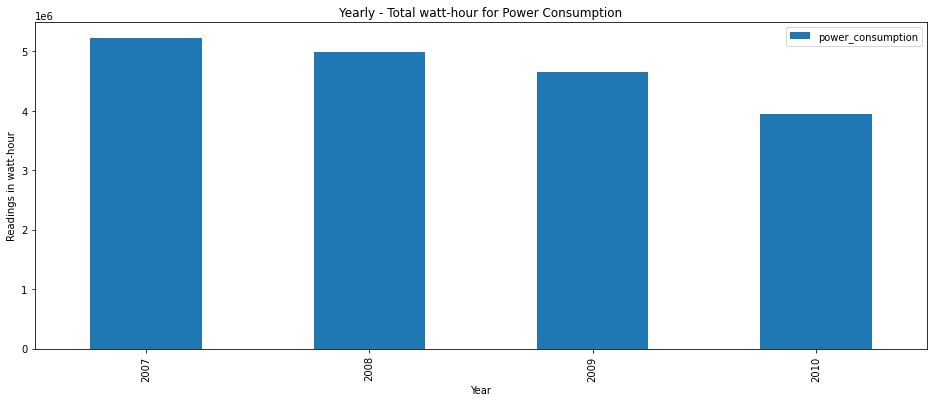

In [26]:
# Yearly - Total watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Total watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Yearly - Maximum watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

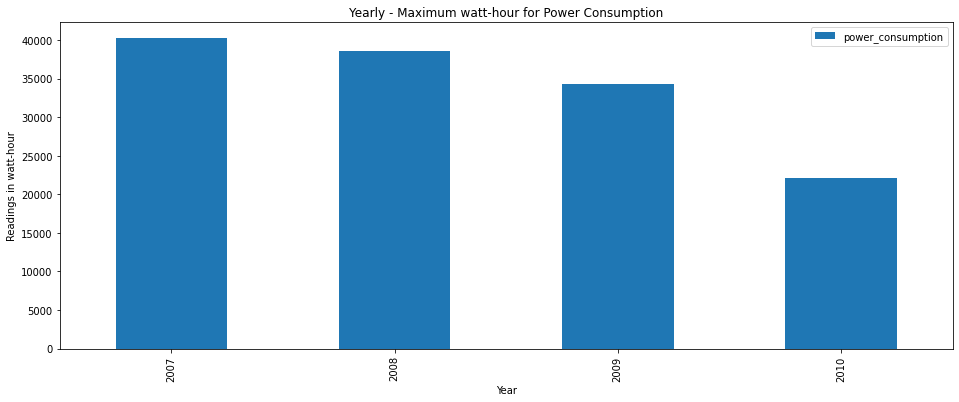

In [27]:
# Yearly - Maximum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Maximum watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Yearly - Minimum watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

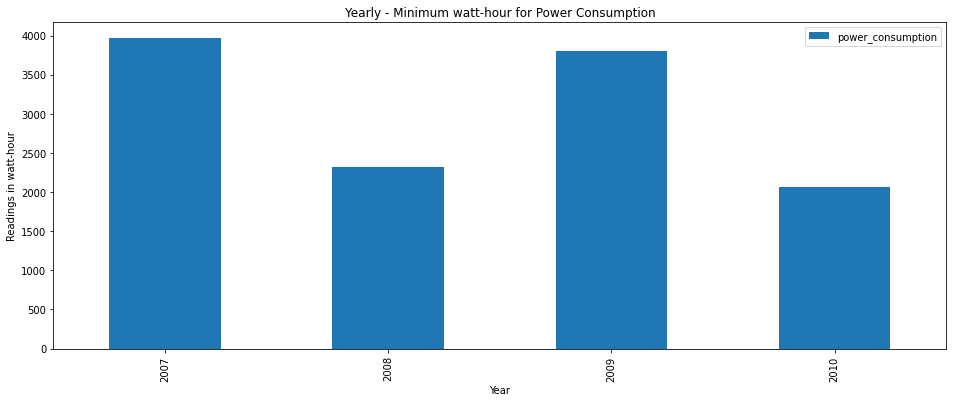

In [28]:
# Yearly - Minimum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.year).min().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Minimum watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Yearly - Average watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

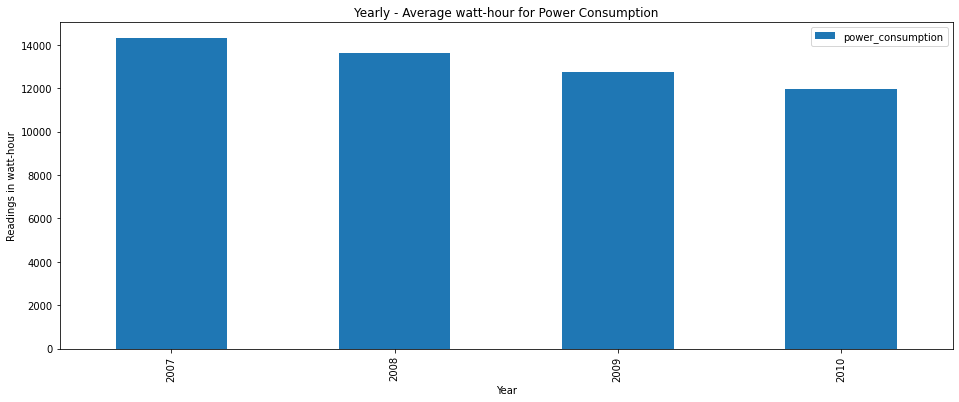

In [29]:
# Yearly - Average watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Average watt-hour for Power Consumption", figsize=(16,6))

###Observation for Yearly Power Consumption (in watt hour)

(Ignoring 2006 year)

1. Total power consumption range is 4000000 - ~5500000 watt hour. i.e., 4000 - ~5500 kWH
2. Maximum Power consumption was done in year 2007
3. Minimum power cosumption was done in year 2010
4. Avearge power consumption is almost same across all years, range is ~12000 WH to ~ 14000 WH *italicized text*

In [30]:
# Checking Statistical summary of power consumption monthly

df_power_consumption.groupby(df_power_consumption.index.month).describe()

power_consumption                                                        \
                 count          mean          std          min           25%   
Date                                                                           
1                124.0  19389.707527  5632.641427  6720.000000  15948.433333   
2                113.0  16656.592330  6718.658289  6144.000000  13403.166667   
3                124.0  15266.406989  4916.855611  6285.800000  12980.950000   
4                120.0  12266.414444  3079.319647  6602.766667  10021.841667   
5                124.0  11405.114785  2363.292832  6484.233333  10004.666667   
6                120.0   9150.598611  2174.683766  4771.433333   7661.691667   
7                124.0   8214.546774  2556.130115  3804.100000   6503.558333   
8                124.0   6856.482796  3972.691229  2313.633333   4020.283333   
9                120.0  10624.775833  2558.721033  2064.000000   9201.758333   
10               124.0  14139.170430  3308.166811  6072.466667  12087.275000   
11               116.0  17139.243103  4762.394143  5986.266667  14093.550000   
12                93.0  18996.422939  4912.675357  6556.633333  16474.933333   

                                                
               50%           75%           max  
Date                                            
1     18171.200000  21616.791667  39584.733333  
2     15853.700000  18589.600000  40009.033333  
3     14471.350000  17221.291667  40280.600000  
4     12023.550000  13968.233333  22783.600000  
5     11237.133333  12551.550000  20776.066667  
6      9025.166667  10220.466667  17056.600000  
7      8164.033333   9645.950000  17373.800000  
8      6324.450000   9023.658333  20304.000000  
9     10284.883333  11618.191667  18543.366667  
10    14083.616667  16341.125000  22719.833333  
11    16515.533333  18959.191667  38598.966667  
12    18149.733333  21249.333333  37083.066667

<AxesSubplot:title={'center':'Monthly - Total watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

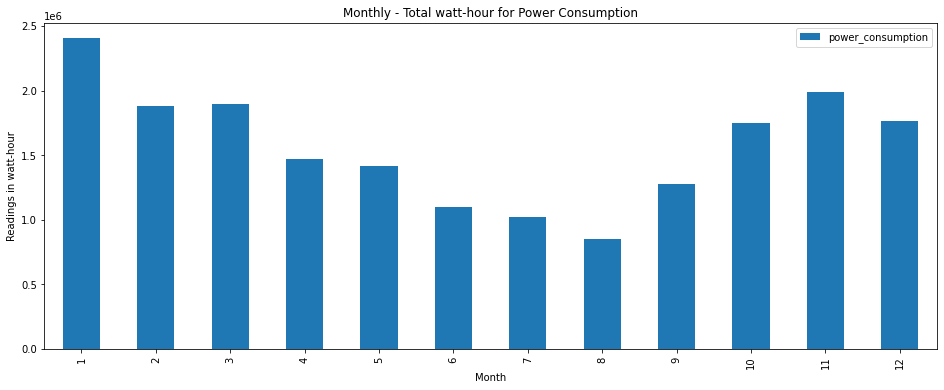

In [31]:
# Monthly - Total watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Monthly - Average watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

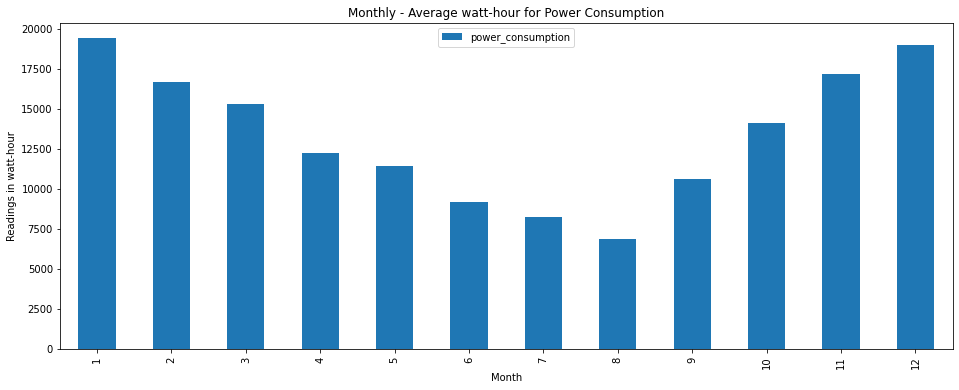

In [32]:
# Monthly - Average watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).mean().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Average watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Monthly - Minimum watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

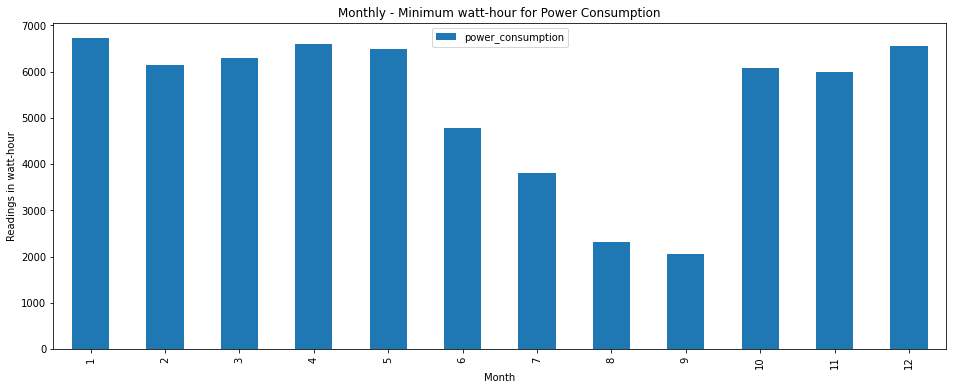

In [33]:
# Monthly - Minimum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).min().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Minimum watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Monthly - Maximum watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

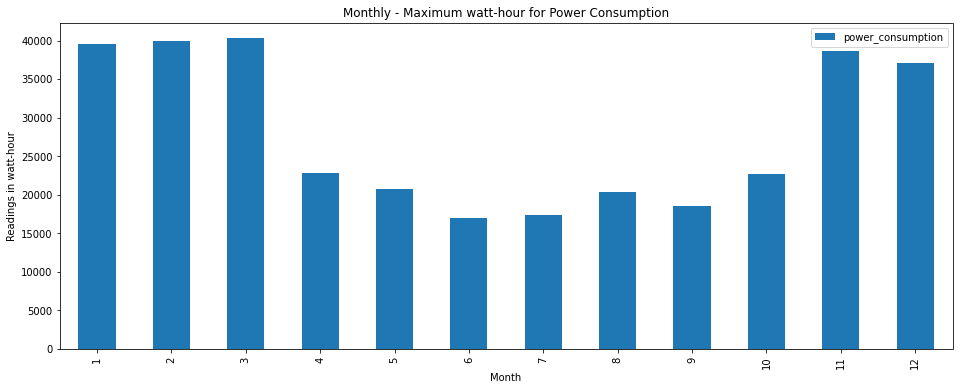

In [34]:
# Monthly - Maximum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).max().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Maximum watt-hour for Power Consumption", figsize=(16,6))

###Observation for Monthly Power Consumption (in watt hour)


1. Total power consumption range is 8000000 - ~ 2300000 watt hour. i.e., 800 - ~2300 kWH
2. Minumum Power consumption is done in september month across all years around 2000 WH
3. Maximum power cosumption is done in December month across all years around ~ 61000 WH
4. Avearge power consumption for all 12 months, range is ~7064 WH to ~ 20000 WH

We can see clearly, that less power is consumed in June, July, August, September, whereas more power is consumed during December, January, February.

If we look at Monthly Average Graph, we can see the power consumption starts decreasing almost after March month till August - September post which the power consumption increases gradually.

In [35]:
# Checking Statistical summary of power consumption quarterly

df_power_consumption.groupby(df_power_consumption.index.quarter).describe()

power_consumption                                                        \
                 count          mean          std          min           25%   
Date                                                                           
1                361.0  17117.875716  6014.053382  6144.000000  13946.733333   
2                364.0  10945.812637  2874.946492  4771.433333   8970.083333   
3                368.0   8542.882518  3466.502670  2064.000000   6391.125000   
4                333.0  16540.770771  4750.481363  5986.266667  13533.866667   

                                                
               50%           75%           max  
Date                                            
1     16259.566667  18816.733333  40280.600000  
2     10619.500000  12452.841667  22783.600000  
3      8735.116667  10498.633333  20304.000000  
4     16309.100000  18689.800000  38598.966667

<AxesSubplot:title={'center':'Quarterly - Total watt-hour for Power Consumption'}, xlabel='Quarters', ylabel='Readings in watt-hour'>

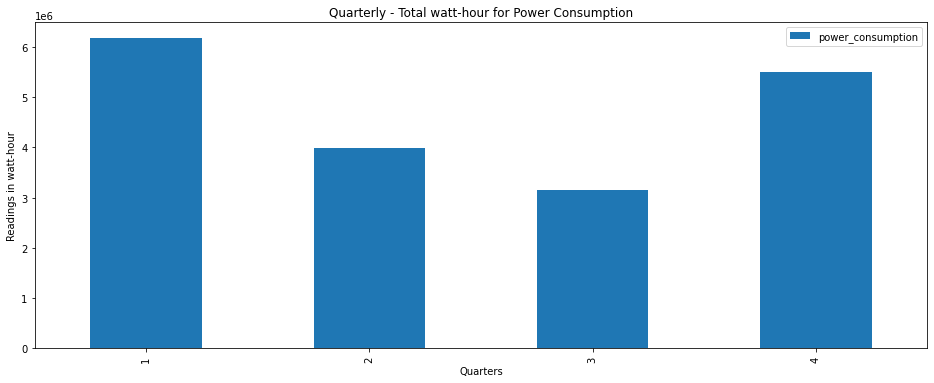

In [36]:
# Quarterly - Total watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.quarter).sum().plot(kind="bar",xlabel='Quarters',ylabel='Readings in watt-hour',title="Quarterly - Total watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Quarterly - Maximum watt-hour for Power Consumption'}, xlabel='Quarters', ylabel='Readings in watt-hour'>

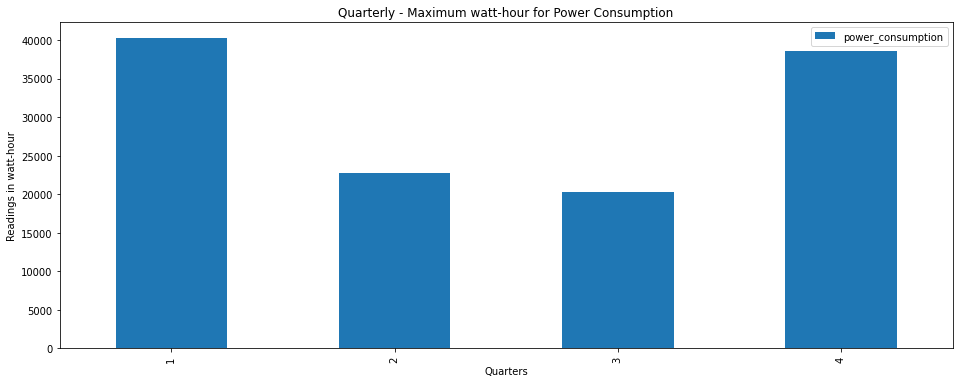

In [37]:
# Quarterly - Maximum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.quarter).max().plot(kind="bar",xlabel='Quarters',ylabel='Readings in watt-hour',title="Quarterly - Maximum watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Quarterly - Minimum watt-hour for Power Consumption'}, xlabel='Quarters', ylabel='Readings in watt-hour'>

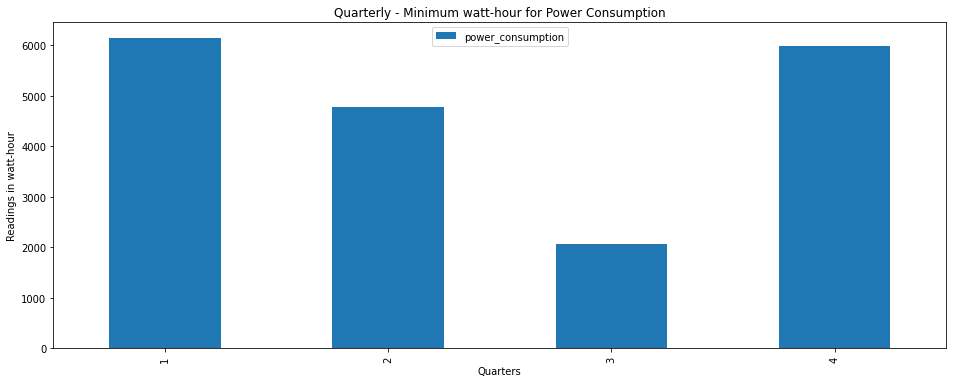

In [38]:
# Quarterly - Minimum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.quarter).min().plot(kind="bar",xlabel='Quarters',ylabel='Readings in watt-hour',title="Quarterly - Minimum watt-hour for Power Consumption", figsize=(16,6))

<AxesSubplot:title={'center':'Quarterly - Average watt-hour for Power Consumption'}, xlabel='Quarters', ylabel='Readings in watt-hour'>

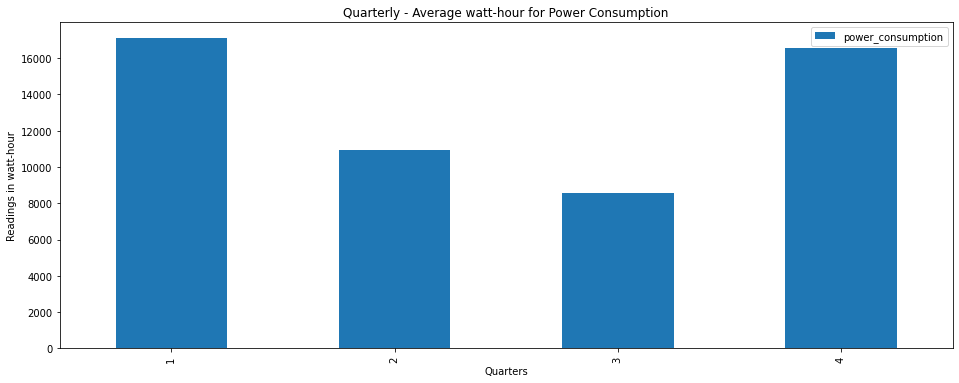

In [39]:
# Quarterly - Average watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.quarter).mean().plot(kind="bar",xlabel='Quarters',ylabel='Readings in watt-hour',title="Quarterly - Average watt-hour for Power Consumption", figsize=(16,6))

###Observation for Quarterly Power Consumption (in watt hour)

1. Minumum Power consumption is done in Third Quarter across all years around 2100 WH
2. Maximum power cosumption is done in Fourth Quarter across all years around ~ 6100 WH
3. Avearge power consumption for Second and third Quarter is comparatively less than First and fourth Quarter, which proves our above observation.

In [40]:
# Checking Statistical summary of power consumption weekly

df_power_consumption.groupby(df_power_consumption.index.week).describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


power_consumption                                                         \
                 count          mean          std           min           25%   
Date                                                                            
1                 28.0  19099.398810  7355.551922   6556.633333  15266.000000   
2                 28.0  18386.042857  6002.440172   6720.000000  15402.958333   
3                 28.0  20037.708333  5133.362752  13385.800000  16708.325000   
4                 28.0  19449.571429  5154.058986  12035.600000  16345.741667   
5                 28.0  19948.520238  6411.189152  12128.633333  16068.325000   
6                 28.0  18066.096429  5229.564029  12583.466667  14733.183333   
7                 28.0  17850.182143  4645.027849  13118.600000  15035.550000   
8                 28.0  15346.205952  7356.534789   6373.333333  10247.700000   
9                 28.0  10805.191667  5038.941633   6144.000000   6357.441667   
10                28.0  17202.405952  6152.357217  11141.200000  14242.100000   
11                28.0  15528.629762  2788.160281   7281.800000  14301.341667   
12                28.0  15040.900000  5268.236365  10086.866667  12682.200000   
13                28.0  15350.716667  4182.459543   9967.966667  13242.991667   
14                28.0  13462.947619  2839.476916   8306.833333  11994.050000   
15                28.0  11727.728571  3345.020939   6602.766667   9710.400000   
16                28.0  12496.594048  3045.273213   8071.600000  10617.450000   
17                28.0  10985.417857  2655.459392   7851.300000   9562.958333   
18                28.0  12007.371429  2950.749137   6484.233333  10152.550000   
19                28.0  12307.942857  2623.409065   7057.066667  10803.091667   
20                28.0  11949.691667  1991.812577   8761.633333  10691.866667   
21                28.0  10608.782143  1894.766952   7646.433333   9321.375000   
22                28.0  10214.641667  2161.206526   7238.300000   8700.516667   
23                28.0   9912.807143  1381.395401   7535.000000   8900.925000   
24                28.0   9611.040476  2347.688235   5280.000000   8452.433333   
25                28.0   7794.322619  1387.910325   4771.433333   6758.441667   
26                28.0   9668.314286  2787.727037   6137.033333   7530.708333   
27                28.0   8690.067857  1908.494181   5533.466667   7415.800000   
28                28.0   8752.994048  2378.267353   3908.966667   7708.083333   
29                28.0   8120.941667  2366.039336   3804.100000   6626.483333   
30                28.0   6579.570238  2064.472992   4063.933333   4594.891667   
31                28.0   6308.728571  2457.027127   3986.066667   4351.866667   
32                28.0   5425.935714  2487.527107   2575.666667   3998.200000   
33                28.0   8947.797619  6020.855031   2422.300000   3934.400000   
34                28.0   6782.538095  3171.001299   2318.266667   4956.900000   
35                28.0   8299.744048  3772.857118   2313.633333   6841.783333   
36                28.0   9897.090476  1702.217561   6813.000000   8855.583333   
37                28.0  10009.877381  1632.797948   7284.100000   9014.358333   
38                28.0  10650.986905  3048.645256   2064.000000   9847.758333   
39                28.0  11703.997619  3303.436712   2064.000000   9582.941667   
40                28.0  13265.503571  2670.279946   8499.133333  11339.208333   
41                28.0  14064.028571  2448.840547   8365.900000  12253.258333   
42                28.0  15445.830952  2548.801204  11594.733333  13494.250000   
43                28.0  14508.634524  3720.931487   6351.866667  12015.025000   
44                28.0  12408.021429  4451.167454   5986.266667   9001.708333   
45                28.0  17455.739286  3815.413851  10924.666667  15207.425000   
46                28.0  17490.202381  4138.692916   9731.166667  14578.641667   
47                26.0  17315.543590

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Total watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

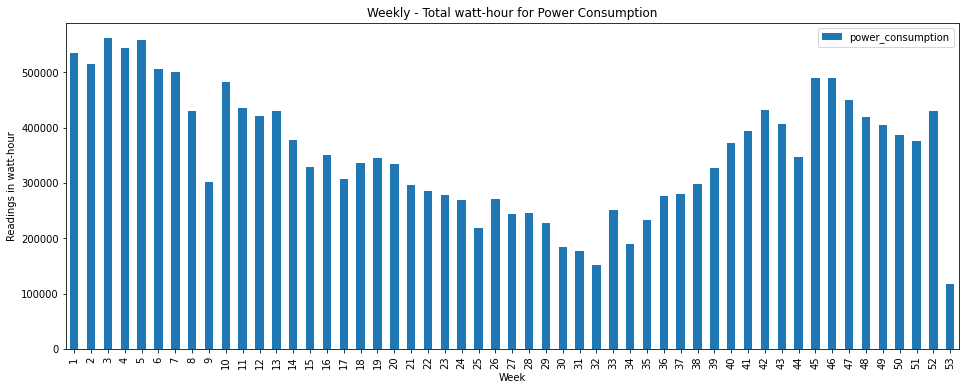

In [41]:
# Weekly - Total watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.week).sum().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Total watt-hour for Power Consumption", figsize=(16,6))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Maximum watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

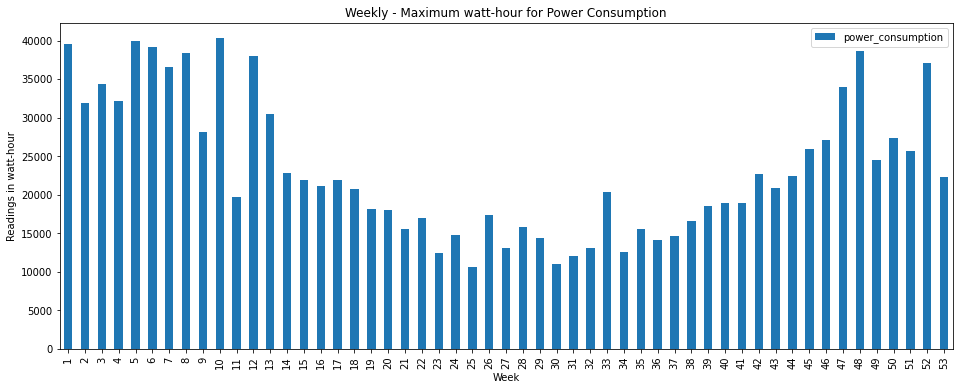

In [42]:
# Weekly - Maximum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.week).max().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Maximum watt-hour for Power Consumption", figsize=(16,6))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Minimum watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

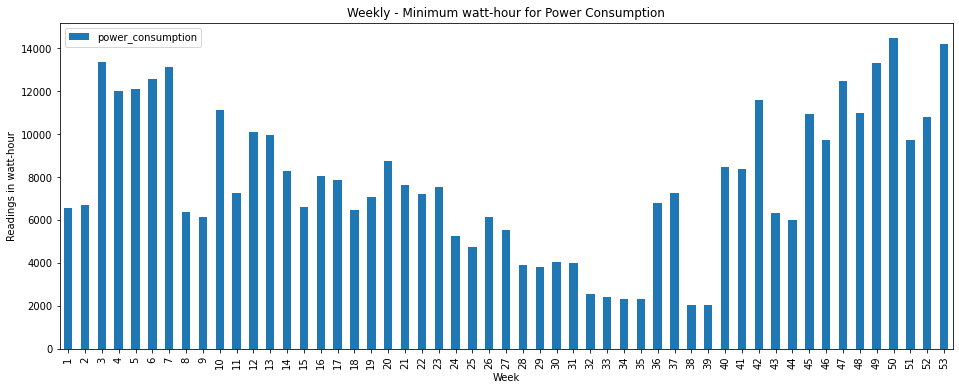

In [43]:
# Weekly - Minimum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.week).min().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Minimum watt-hour for Power Consumption", figsize=(16,6))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Average watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

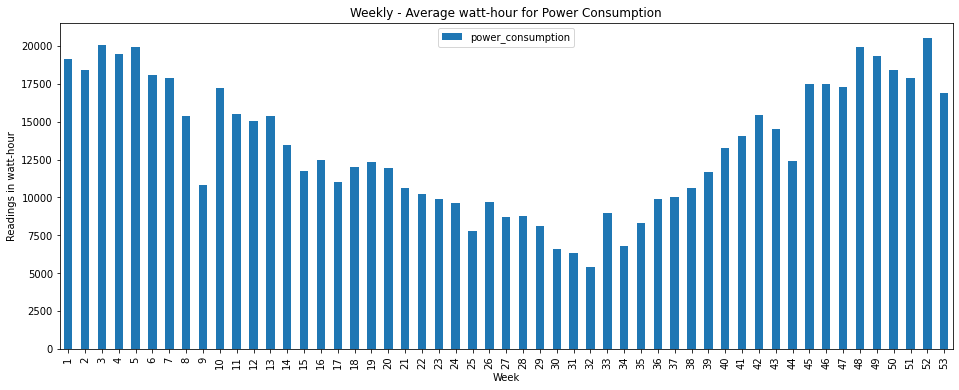

In [44]:
# Weekly - Average watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.week).mean().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Average watt-hour for Power Consumption", figsize=(16,6))

In [45]:
# analysis of week 9 for all 4 years
data = df_power_consumption[df_power_consumption.index.week==9]
print(data.groupby(data.index.year).mean())

      power_consumption
Date                   
2007        7950.200000
2008        8810.290476
2009       16189.995238
2010       10270.280952


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [46]:
# analysis of week 8 for all 4 years
data_2 = df_power_consumption[df_power_consumption.index.week==8]
print(data.groupby(data.index.year).mean())

      power_consumption
Date                   
2007        7950.200000
2008        8810.290476
2009       16189.995238
2010       10270.280952


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [47]:
data.index

DatetimeIndex(['2007-02-26', '2007-02-27', '2007-02-28', '2007-03-01',
               '2007-03-02', '2007-03-03', '2007-03-04', '2008-02-25',
               '2008-02-26', '2008-02-27', '2008-02-28', '2008-02-29',
               '2008-03-01', '2008-03-02', '2009-02-23', '2009-02-24',
               '2009-02-25', '2009-02-26', '2009-02-27', '2009-02-28',
               '2009-03-01', '2010-03-01', '2010-03-02', '2010-03-03',
               '2010-03-04', '2010-03-05', '2010-03-06', '2010-03-07'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [48]:
# creating separate sub dataframes of week 9 for each year

week9_2007 = df_data[(df_data.index >= '2007-02-26') & (df_data.index <= '2007-03-04')]
week9_2008 = df_data[(df_data.index >= '2008-02-25') & (df_data.index <= '2008-03-02')]
week9_2009 = df_data[(df_data.index >= '2009-02-23') & (df_data.index <= '2009-03-01')]
week9_2010 = df_data[(df_data.index >= '2010-03-01') & (df_data.index <= '2010-03-07')]

In [49]:
# Check entire data of week 9 of year 2007

week9_2007

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2007-02-26,568.484,108.280,347433.97,2388.8,0.0,331.0,2830.0,6313.733333
2007-02-27,518.112,113.204,349839.75,2195.4,0.0,314.0,1924.0,6397.200000
2007-02-28,520.774,113.372,348709.81,2201.0,0.0,340.0,1973.0,6366.566667
2007-03-01,517.564,107.628,347502.82,2172.8,0.0,316.0,1980.0,6330.066667
2007-03-02,515.688,107.008,346451.90,2169.8,0.0,340.0,1969.0,6285.800000
2007-03-03,819.122,134.992,347454.84,3457.6,0.0,347.0,4597.0,8708.033333
2007-03-04,2090.700,175.682,345642.91,8867.8,1476.0,8711.0,9408.0,15250.000000


In [50]:
# # Check entire data of week 9 of year 2009

week9_2009

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2009-02-23,2733.656,129.800,347386.87,11337.2,1212.0,3744.0,12471.0,28133.933333
2009-02-24,1783.144,123.346,346878.61,7441.4,0.0,1602.0,14512.0,13605.066667
2009-02-25,1169.844,113.070,347330.83,4914.0,1092.0,274.0,7359.0,10772.400000
2009-02-26,1156.852,112.600,346654.61,4842.8,0.0,268.0,6841.0,12171.866667
2009-02-27,2028.918,202.116,346990.59,8501.0,1154.0,246.0,14831.0,17584.300000
2009-02-28,1630.750,212.588,349052.08,6961.4,1145.0,5358.0,8006.0,12670.166667
2009-03-01,2472.554,189.494,348681.21,10412.2,11224.0,2741.0,8852.0,18392.233333


In [51]:
# # Check entire data of week 9 of year 2008

week9_2008

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2008-02-25,504.488,91.720,345277.45,2096.0,0.0,321.0,1856.0,6231.133333
2008-02-26,507.120,84.590,344927.99,2101.0,0.0,295.0,2013.0,6144.000000
2008-02-27,566.720,86.168,344957.79,2353.2,0.0,326.0,2969.0,6150.333333
2008-02-28,509.184,83.248,345318.15,2112.4,0.0,281.0,2028.0,6177.400000
2008-02-29,1333.348,88.948,342775.43,5576.6,0.0,3773.0,8062.0,10387.466667
2008-03-01,1141.876,105.158,344781.38,4719.8,0.0,1287.0,2724.0,15020.266667
2008-03-02,1162.226,144.710,345234.59,4932.0,0.0,5244.0,2565.0,11561.433333


In [52]:
# check statistical summary of week 9 for year 2007

week9_2007.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,792.920571,122.880857,347576.571429,3350.457143,210.857143,1528.428571,3525.857143,7950.200000
std,582.745282,25.220635,1381.468556,2477.013411,557.875562,3167.240800,2769.535426,3338.017812
min,515.688000,107.008000,345642.910000,2169.800000,0.000000,314.000000,1924.000000,6285.800000
25%,517.838000,107.954000,346942.935000,2184.100000,0.000000,323.500000,1971.000000,6321.900000
50%,520.774000,113.204000,347454.840000,2201.000000,0.000000,340.000000,1980.000000,6366.566667
75%,693.803000,124.182000,348106.315000,2923.200000,0.000000,343.500000,3713.500000,7552.616667
max,2090.700000,175.682000,349839.750000,8867.800000,1476.000000,8711.000000,9408.000000,15250.000000


In [53]:
# check statistical summary of week 9 for year 2009

week9_2009.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1853.674000,154.716286,347567.828571,7772.857143,2261.000000,2033.285714,10410.285714,16189.995238
std,604.971789,44.569175,928.594781,2507.571478,3989.517055,2003.032927,3436.866485,5972.413525
min,1156.852000,112.600000,346654.610000,4842.800000,0.000000,246.000000,6841.000000,10772.400000
25%,1400.297000,118.208000,346934.600000,5937.700000,546.000000,271.000000,7682.500000,12421.016667
50%,1783.144000,129.800000,347330.830000,7441.400000,1145.000000,1602.000000,8852.000000,13605.066667
75%,2250.736000,195.805000,348034.040000,9456.600000,1183.000000,3242.500000,13491.500000,17988.266667
max,2733.656000,212.588000,349052.080000,11337.200000,11224.000000,5358.000000,14831.000000,28133.933333


In [54]:
week9_2007.sum()

Global_active_power         5550.444
Global_reactive_power        860.166
Voltage                  2433036.000
Global_intensity           23453.200
Sub_metering_1              1476.000
Sub_metering_2             10699.000
Sub_metering_3             24681.000
power_consumption          55651.400
dtype: float64

In [55]:
week9_2007.mean()

Global_active_power         792.920571
Global_reactive_power       122.880857
Voltage                  347576.571429
Global_intensity           3350.457143
Sub_metering_1              210.857143
Sub_metering_2             1528.428571
Sub_metering_3             3525.857143
power_consumption          7950.200000
dtype: float64

In [56]:
# check sentire data of week 9 for year 2010

week9_2010

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2010-03-01,1298.728,130.076,348224.80,5411.2,1785.0,471.0,7115.0,12274.466667
2010-03-02,766.906,136.396,348122.96,3204.8,0.0,424.0,3605.0,8752.766667
2010-03-03,935.834,120.934,347344.47,3935.6,0.0,425.0,7221.0,7951.233333
2010-03-04,682.880,125.954,349908.90,2890.4,0.0,436.0,2928.0,8017.333333
2010-03-05,1133.726,135.416,350620.29,4703.4,1108.0,351.0,5918.0,11518.433333
2010-03-06,794.712,139.558,349965.01,3321.6,0.0,419.0,3970.0,8856.200000
2010-03-07,1372.472,133.948,350714.51,5712.0,0.0,4674.0,3679.0,14521.533333


## Observation for Week 9

1. In week 9 for year 2007 and 2008, from above statistical summary we can see and note the inference as the readings of Global Active power is less than half of the readings of Global Active power for year 2009 and 2010, similarly the figures are 0s for sub metering 1 for week 9 of year 2007 and 2008 whereas, most of the readings are available for year 2009 and 2010, also there is noticeable change in the readings of sub metering 3 for year 2007 and 2008 as compared to year 2009 and 2010.

2. There could be few assumptions behind this figures, as from the graph it is noticeable that power consumption is less for week 9. 

- First assumption could be the data collected wouldn't be correct for that week or some campaign in some region to save electricity as much as possible to see how much power can be saved within a week

- Second assumption could be, some tragic incident might happen with the powerhouse of the region, due to which the power might be fluctuating many times in a day.

- Third assumption can be, few members of families go out for a couple of days

- Fourth assumption is, if in case the collected data is from cold region and suddenly for a week the weather or temperature changes which might result is less consumption of energy

###Observation for Weekly Power Consumption (in watt hour)

1. Minumum Power consumption is done in between 28th to 35th week
2. Maximum power cosumption is done in almost first 12 weeks and in last 50th to 52th week
3. Avearge power consumption for is comparatively less in from 20th week to almost 38th week as compared to other weeks.

#### We completed Analysis for Power Consumption dataset

-------------------------------------------------------------------------------------------


## Let's start with Sub-metering analysis for Yearly, Quarterly, Monthly and Weekly

<AxesSubplot:title={'center':'Yearly - Maximum watt-hour for sub_meterings'}, xlabel='Year', ylabel='Readings in watt-hour'>

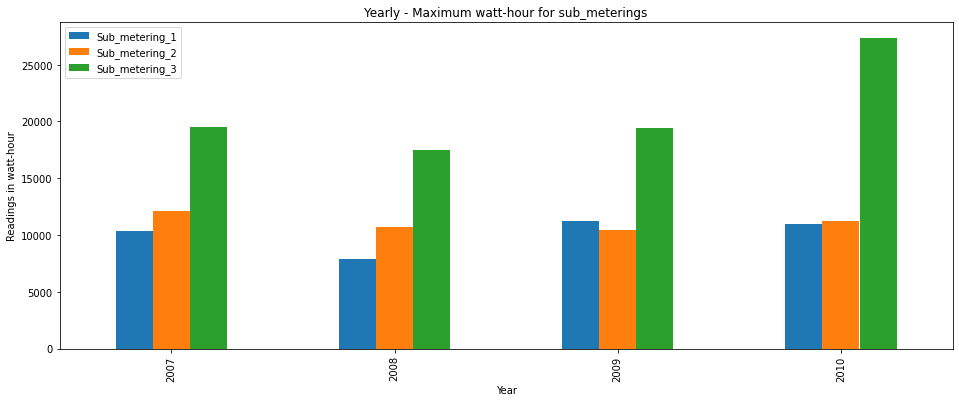

In [57]:
# Yearly - Maximum watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Maximum watt-hour for sub_meterings",figsize=(16,6))

<AxesSubplot:title={'center':'Yearly - Average watt-hour for sub_meterings'}, xlabel='Year', ylabel='Readings in watt-hour'>

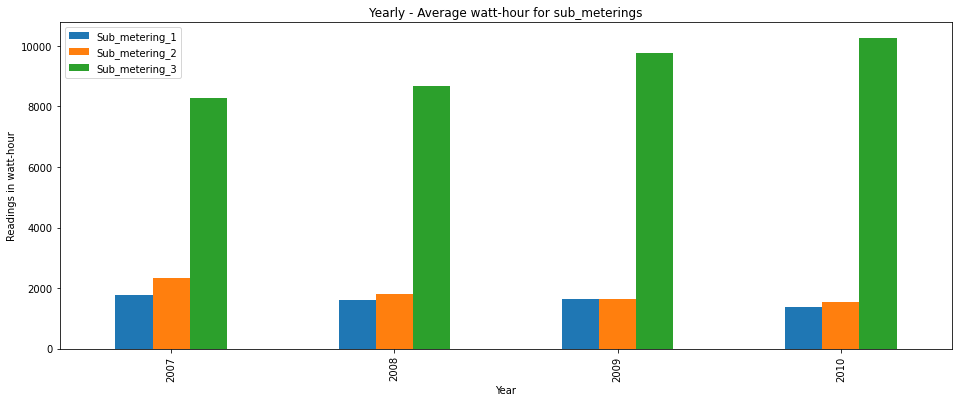

In [58]:
# Yearly - Average watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Average watt-hour for sub_meterings",figsize=(16,6))

###Observation for Yearly Sub-Meterings: 1,2,3 (in watt hour)

(Ignoring year 2006)

1. Maximum enerygy is taken by submetering 3 in all years followed by submetering 2 and then submetering 3
2. consumption of energy is increasing every year by submetering 3 (comprises of AC and water heater)
3. After submetering 3, it is followed by submetering 2 (comprises of  laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.), followed by submetering 1 (comprises of  kitchen, containing mainly a dishwasher, an oven and a microwave)

Reasons could be understood for sub metering 3 might be increasing Global Warming, increased humidity or so, families with more percentage of teenagers, youth or toddlers at home makes submetering 2 to consume energy, for sub-metring 1 not more families might be having kitchen applicances working on electricity.

<AxesSubplot:title={'center':'Monthly - Total watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

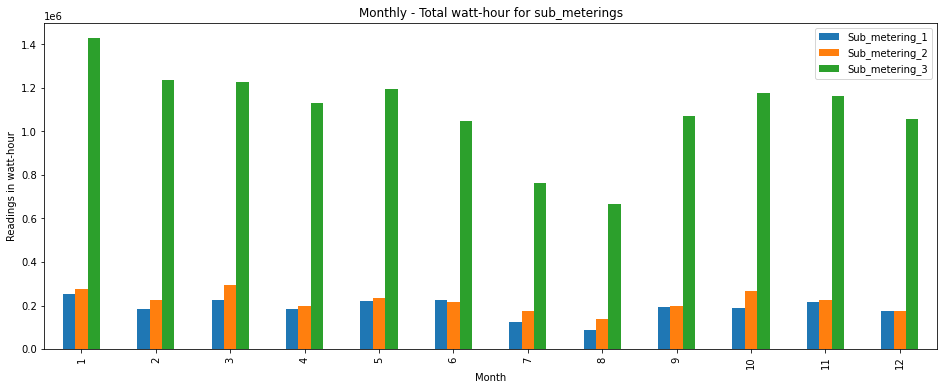

In [59]:
# Monthly - Total watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for sub_meterings",figsize=(16,6))

<AxesSubplot:title={'center':'Monthly - Maximum watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

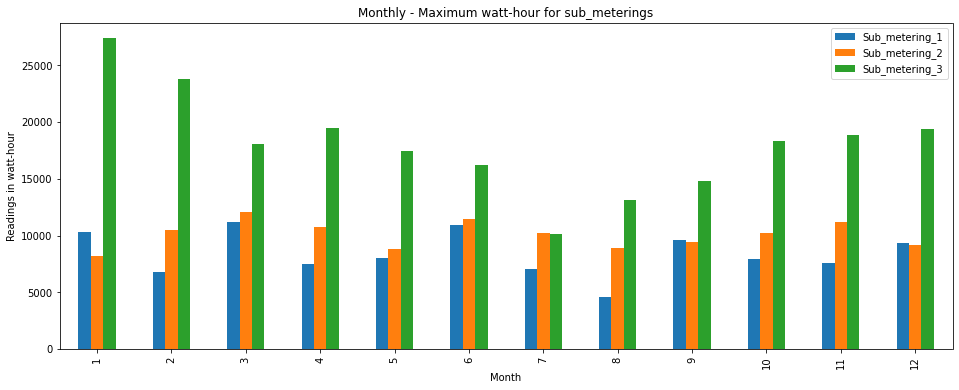

In [60]:
# Monthly - Maximum watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.month).max().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Maximum watt-hour for sub_meterings",figsize=(16,6))

<AxesSubplot:title={'center':'Monthly - Average watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

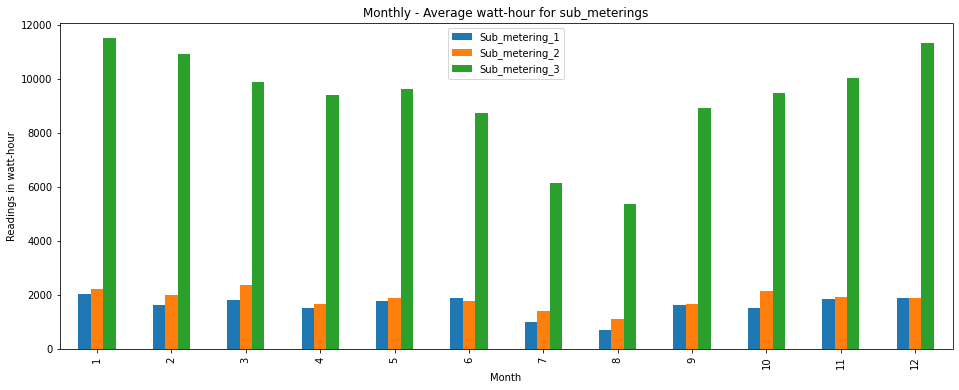

In [61]:
# Monthly - Average watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.month).mean().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Average watt-hour for sub_meterings",figsize=(16,6))

###Observation for Monthly Sub-Meterings: 1,2,3 (in watt hour)

1. Consumption of sub-metering 3 enerygy is comparatively low in july  and august month
2. Sub-metering 1 and 2 consumes almost same amount of energy on average as compared to submetering 3...it increases from around september till january february month

<AxesSubplot:title={'center':'Quarterly - Total watt-hour for sub-meterings'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

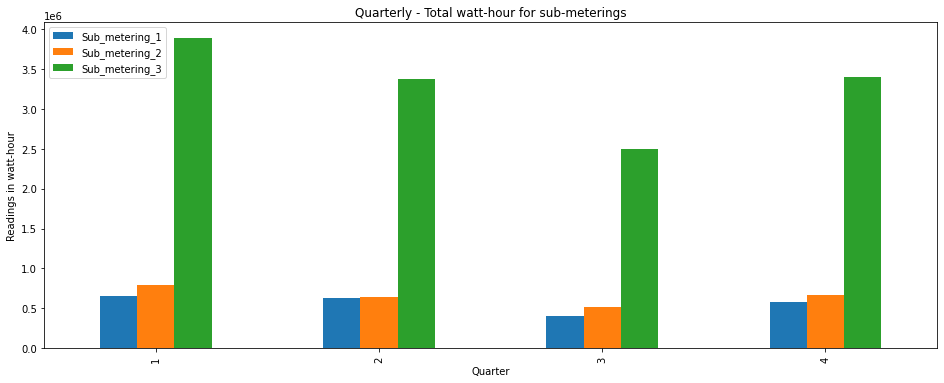

In [62]:
# Quarterly - Total watt-hour for sub-meterings

df_sub_meterings.groupby(df_sub_meterings.index.quarter).sum().plot(kind="bar",xlabel='Quarter',ylabel='Readings in watt-hour',figsize=(16,6),title="Quarterly - Total watt-hour for sub-meterings")

## total 4000 kilo watt consumed by submetering 3 quarterly 4.0 * le6 = 4000000 * 0.001

<AxesSubplot:title={'center':'Quarterly - Maximum watt-hour for sub-meterings'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

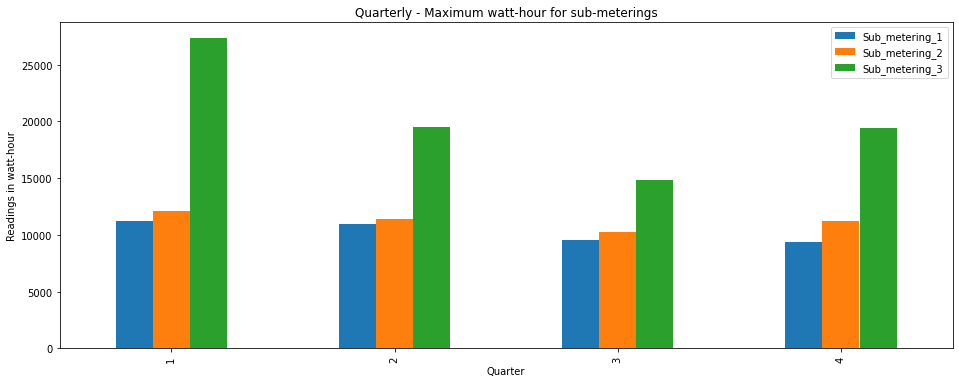

In [63]:
# Quarterly - Maximum watt-hour for sub-meterings

df_sub_meterings.groupby(df_sub_meterings.index.quarter).max().plot(kind="bar",xlabel='Quarter',ylabel='Readings in watt-hour',figsize=(16,6),title="Quarterly - Maximum watt-hour for sub-meterings")

<AxesSubplot:title={'center':'Quarterly - Average watt-hour for sub-meterings'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

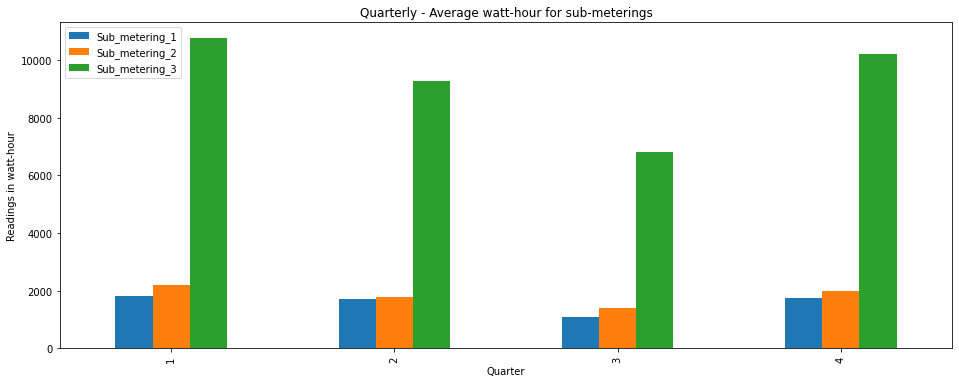

In [64]:
# Quarterly - Average watt-hour for sub-meterings

df_sub_meterings.groupby(df_sub_meterings.index.quarter).mean().plot(kind="bar",xlabel='Quarter',ylabel='Readings in watt-hour',figsize=(16,6),title="Quarterly - Average watt-hour for sub-meterings")

Observation for Quarterly Sub-Meterings: 1,2,3 (in watt hour)

1. Consumption of submetering 1 and 2 is almost same in Second Quarter, whereas submetering 3 consumes less energy in 2nd and 3rd quarter as compared to 1st and 4th quarter.
2. Average consumption of submetering 1,2 and 3 is almost same in quarter 1st and 4th quarter.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Total watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

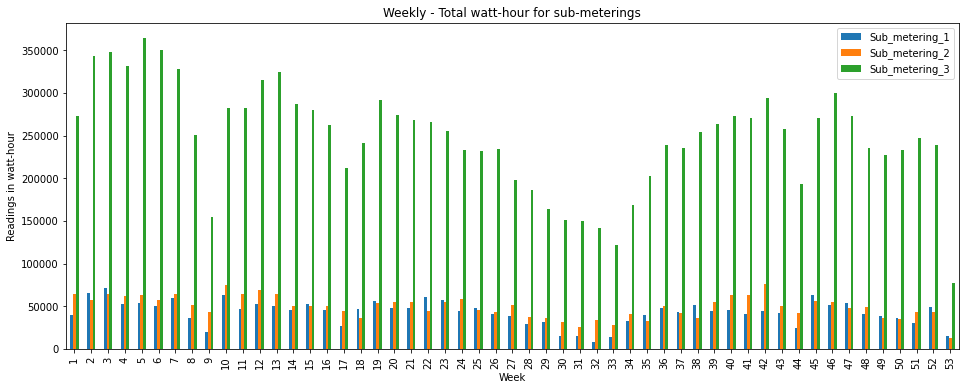

In [65]:
# Weekly - Total watt-hour for sub-meterings

df_sub_meterings.groupby(df_sub_meterings.index.week).sum().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Total watt-hour for sub-meterings")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Maximum watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

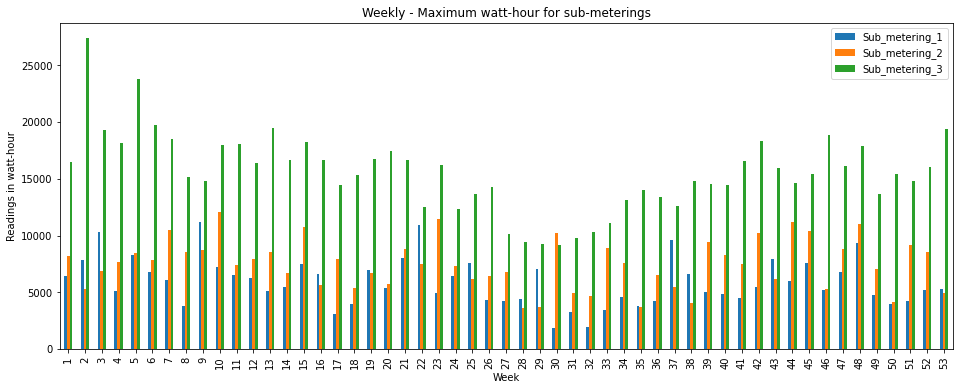

In [66]:
# Weekly - Maximum watt-hour for sub-meterings

df_sub_meterings.groupby(df_sub_meterings.index.week).max().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Maximum watt-hour for sub-meterings")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Minimum watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

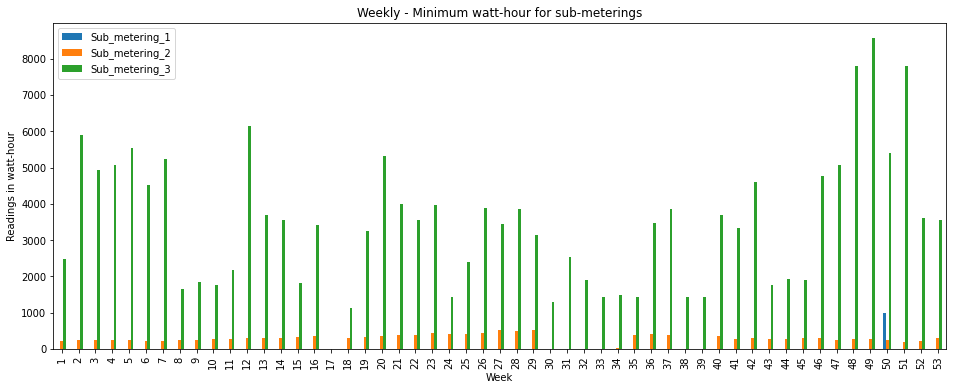

In [67]:
# Weekly - Minimum watt-hour for sub-meterings

df_sub_meterings.groupby(df_sub_meterings.index.week).min().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Minimum watt-hour for sub-meterings")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Average watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

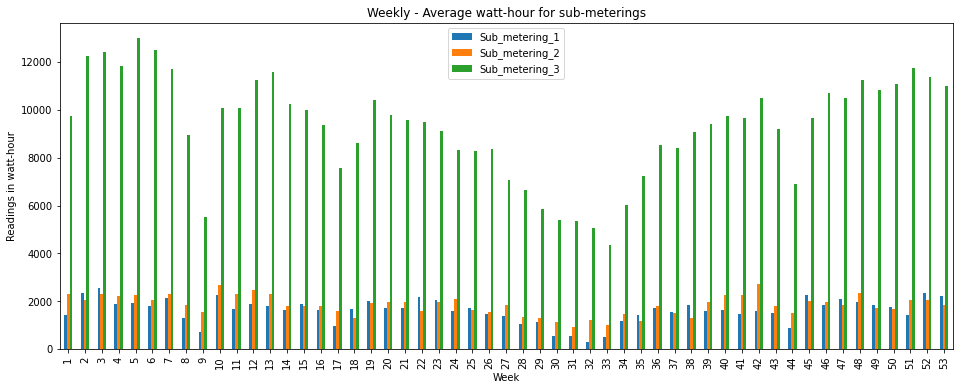

In [68]:
# Weekly - Average watt-hour for sub-meterings

df_sub_meterings.groupby(df_sub_meterings.index.week).mean().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Average watt-hour for sub-meterings")

###Observation for Weekly Sub-Meterings: 1,2,3 (in watt hour)

Consumption of energy for all submetering on average remains high im almost all weeks except weeks betwwen 28th to 33rd


We completed Analysis for Sub-Meterings dataset

------------------------------------------------------------------------------


### Let's start with Global_active_power, Global_reactive_power and Global Intensity analysis for Yearly, Quarterly, Monthly and Weekly

(Global_active_power and Global_reactive_power measured in kilowatt whereas, Global_intensity measured in Ampere)

kilowatt = (ampere * volt) / 1000

<AxesSubplot:title={'center':'Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

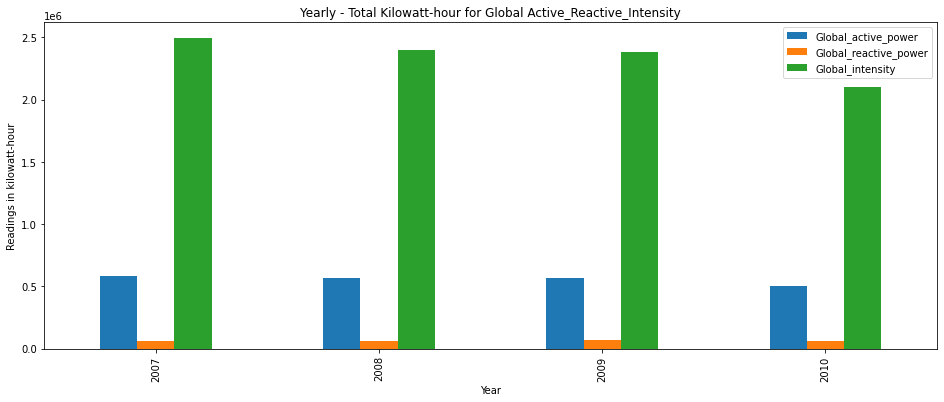

In [69]:
# Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity

df_active_reactive.groupby(df_active_reactive.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Yearly - Maximum Kilowatt-hour for active_reactive'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

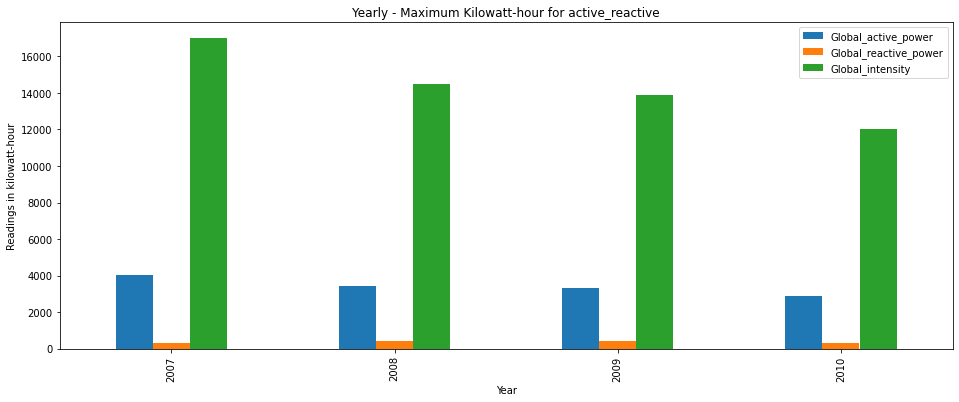

In [70]:
# Yearly - Maximum Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Maximum Kilowatt-hour for active_reactive")

<AxesSubplot:title={'center':'Yearly - Minimum Kilowatt-hour for active_reactive'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

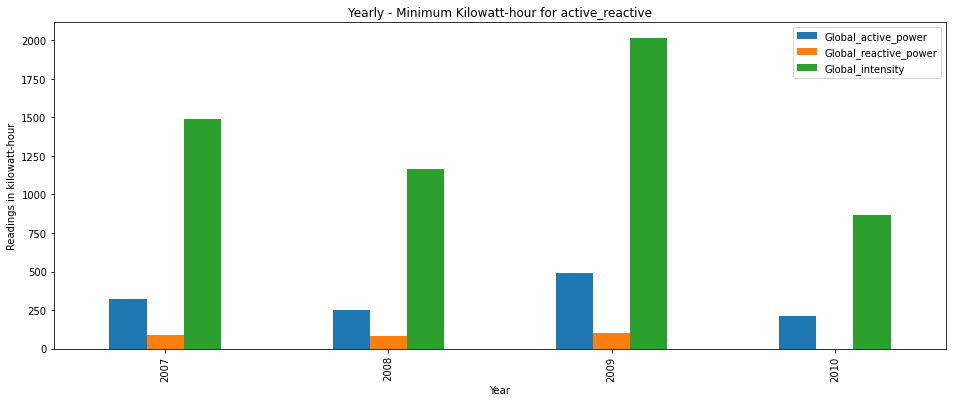

In [71]:
# Yearly - Minimum Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.year).min().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Minimum Kilowatt-hour for active_reactive")

<AxesSubplot:title={'center':'Yearly - Average Kilowatt-hour for active_reactive'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

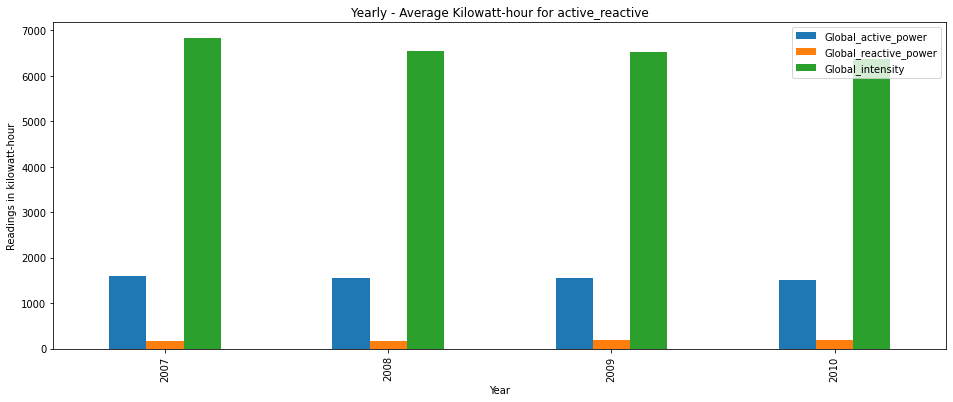

In [72]:
# Yearly - Average Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Average Kilowatt-hour for active_reactive")

###Observation for Yearly Global Reactive Power, Global Reactive Power and Global Intensity (in kilowatt hour)

(Ignoring year 2006)

1. From the Yearly - Total graph, we can say that the ratio of Global Active and Global Reactive power is about 6:1, that means for every 6 kWH of Global Active Power , there is about 1 kWH of Global Reactive Power

2. From the Yearly - Maximum graph, in the year 2007, maximum real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.

3. From the Yearly - Minimum graph, in the year 2010, minimum real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.

But, according to me, there was less data for more than a month at the end of year 2010. If the data would have been available then it seems the consumption of real power would be nearly same as year 2008 or else it could be same as year 2009. 

4. From the Yearly - Average graph, average real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances is nearly same across all years.

<AxesSubplot:title={'center':'Month - Total Kilowatt-hour for active_reactive'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

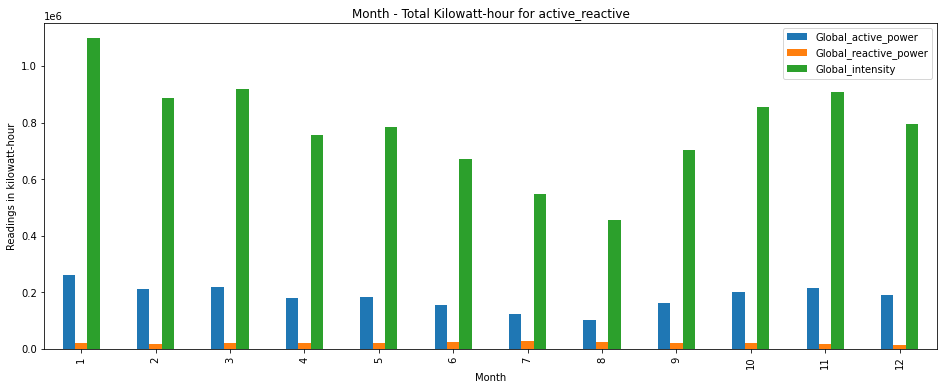

In [73]:
# Month - Total Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Month - Total Kilowatt-hour for active_reactive")


<AxesSubplot:title={'center':'Month - Maximum Kilowatt-hour for active_reactive'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

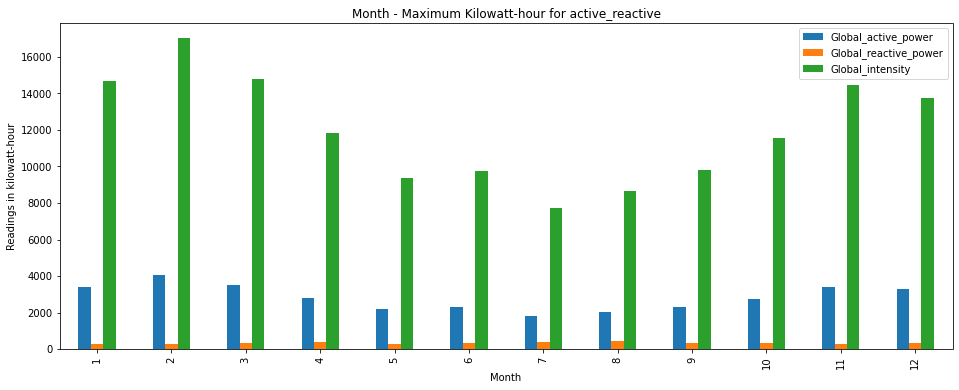

In [74]:
# Month - Maximum Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.month).max().plot(kind="bar",xlabel='Month',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Month - Maximum Kilowatt-hour for active_reactive")


<AxesSubplot:title={'center':'Month - Minimum Kilowatt-hour for active_reactive'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

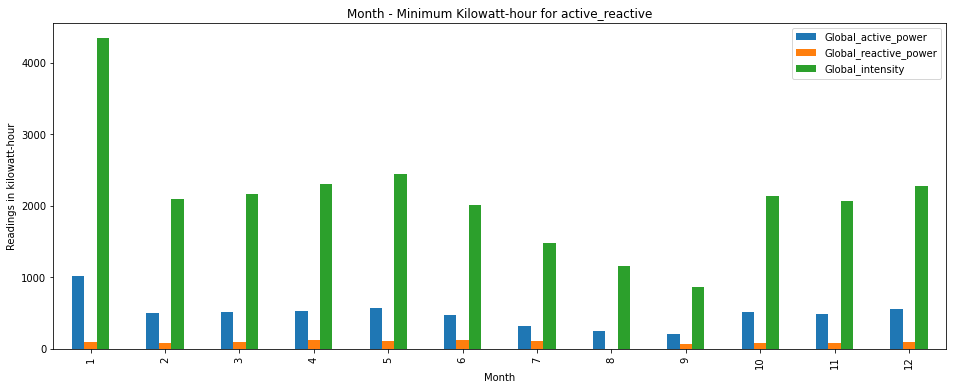

In [75]:
# Month - Minimum Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.month).min().plot(kind="bar",xlabel='Month',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Month - Minimum Kilowatt-hour for active_reactive")

<AxesSubplot:title={'center':'Month - Average Kilowatt-hour for active_reactive'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

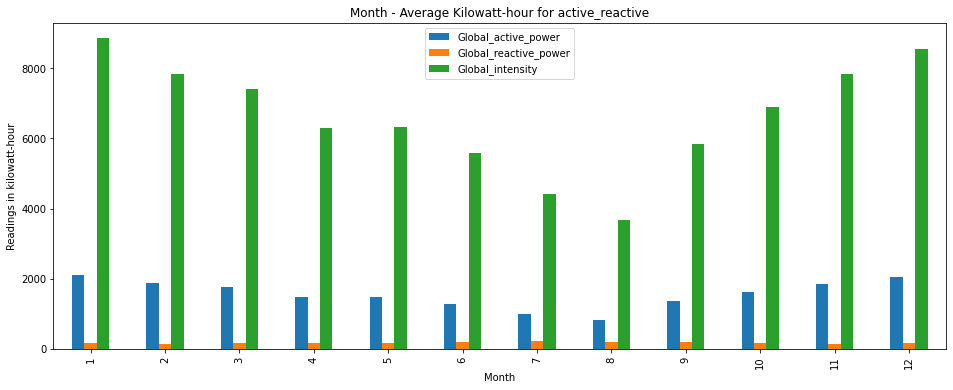

In [76]:
# Month - Average Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.month).mean().plot(kind="bar",xlabel='Month',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Month - Average Kilowatt-hour for active_reactive")


### Observation for Monthly Global Reactive Power, Global Reactive Power and Global Intensity (in kilowatt hour)

1. Maximum consumption of real energy is visualised in 12th month (i.e. December)
2. Minimum consumption of real energy is visualised in 9th month (i.e. September)
3. On Average, we can say that the real power is consumed less from june till September, post that the consumption increases for remaining g months

<AxesSubplot:title={'center':'Quarterly - Total Kilowatt-hour for active_reactive'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

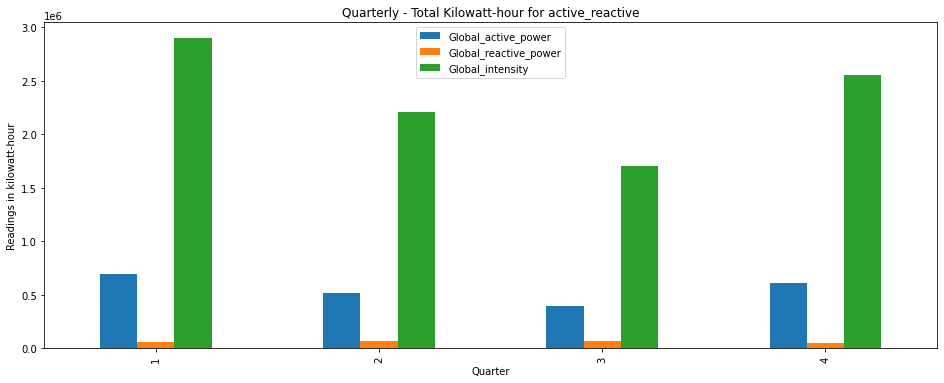

In [77]:
# Quarterly - Total Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.quarter).sum().plot(kind="bar",xlabel='Quarter',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Quarterly - Total Kilowatt-hour for active_reactive")

<AxesSubplot:title={'center':'Quarterly - Maximum Kilowatt-hour for active_reactive'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

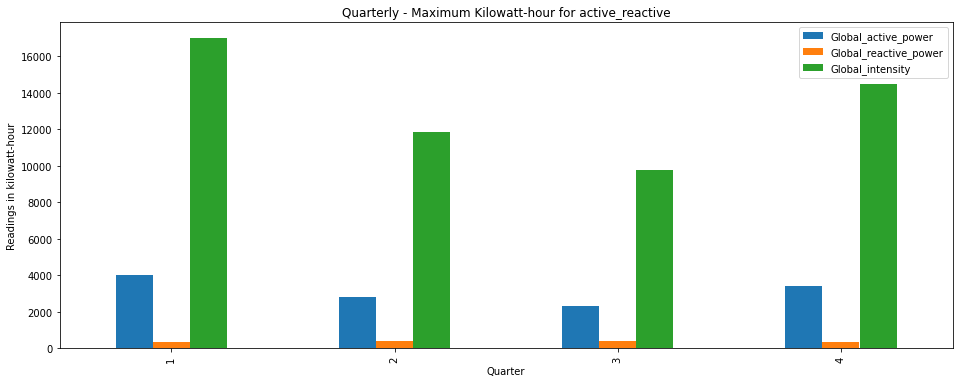

In [78]:
# Quarterly - Maximum Kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.quarter).max().plot(kind="bar",xlabel='Quarter',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Quarterly - Maximum Kilowatt-hour for active_reactive")

<AxesSubplot:title={'center':'Quarterly - Minimum watt-hour for active_reactive'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

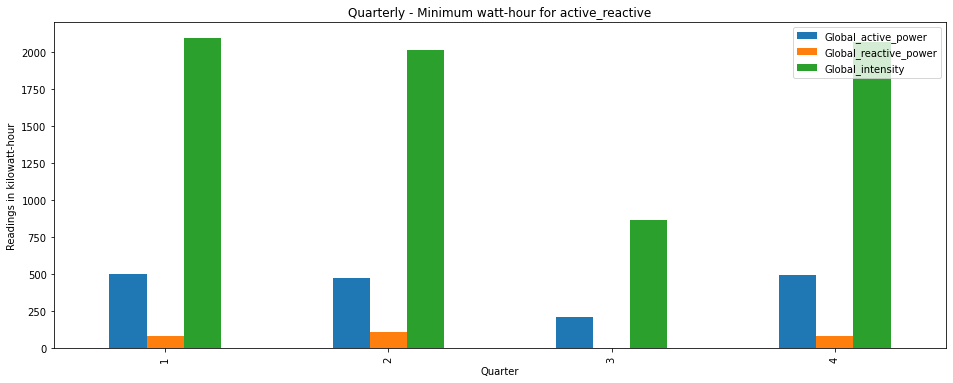

In [79]:
# Quarterly - Minimum watt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.quarter).min().plot(kind="bar",xlabel='Quarter',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Quarterly - Minimum watt-hour for active_reactive")

<AxesSubplot:title={'center':'Quarterly - Average watt-hour for active_reactive'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

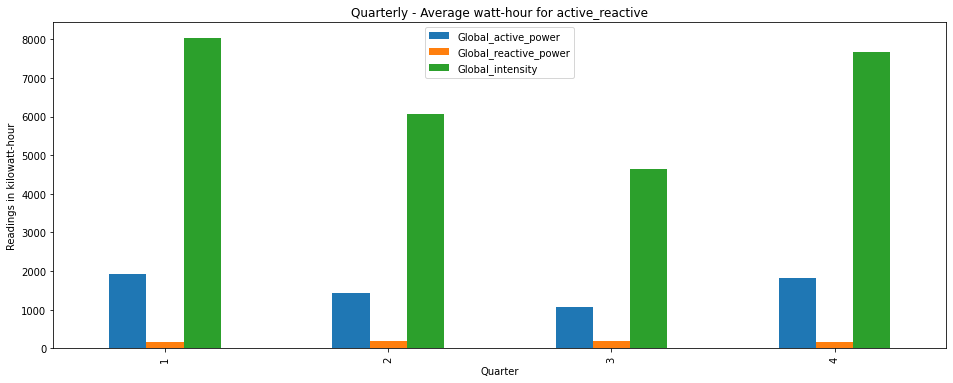

In [80]:
# Quarterly - Average watt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.quarter).mean().plot(kind="bar",xlabel='Quarter',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Quarterly - Average watt-hour for active_reactive")

### Observation for Quarterly Global Reactive Power, Global Reactive Power and Global Intensity (in kilowatt hour)

1. Consumption of Global Reactive Power, Global Reactive Power and Global Intensity is almost same in First Quarter and Fourth Quarter, whereas Global Reactive Power, Global Reactive Power and Global Intensity consumes less energy in 2nd and 3rd quarter as compared to 1st and 4th quarter.

We can conclude from above visualizations, increase or decrease in Global Reactive Power there is drastic change in Global Intensity.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Total kilowatt-hour for active_reactive'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

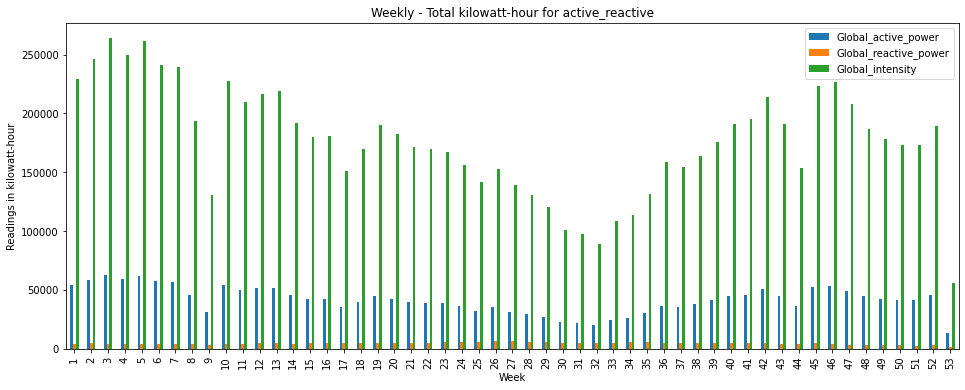

In [81]:
# Weekly - Total kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.week).sum().plot(kind="bar",xlabel='Week',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Weekly - Total kilowatt-hour for active_reactive")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Maximum kilowatt-hour for active_reactive'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

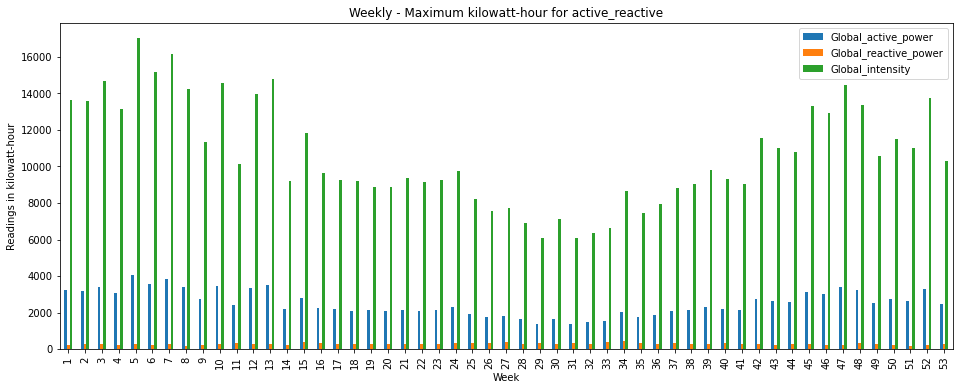

In [82]:
# Weekly - Maximum kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.week).max().plot(kind="bar",xlabel='Week',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Weekly - Maximum kilowatt-hour for active_reactive")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Minimum kilowatt-hour for active_reactive'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

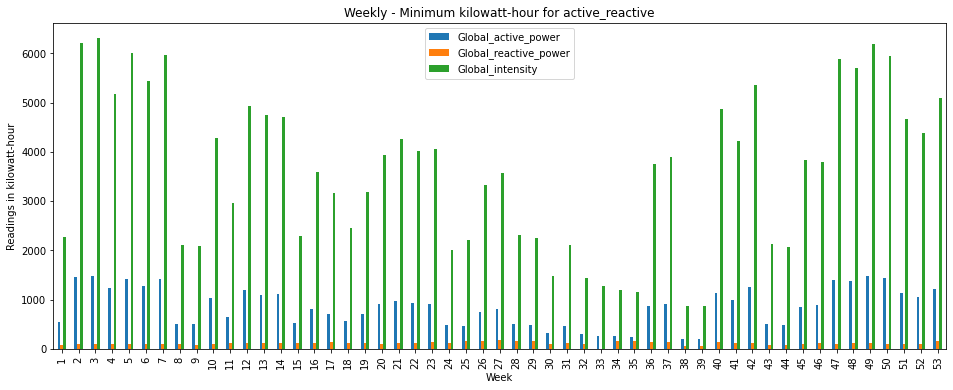

In [83]:
# Weekly - Minimum kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.week).min().plot(kind="bar",xlabel='Week',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Weekly - Minimum kilowatt-hour for active_reactive")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Weekly - Average kilowatt-hour for active_reactive'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

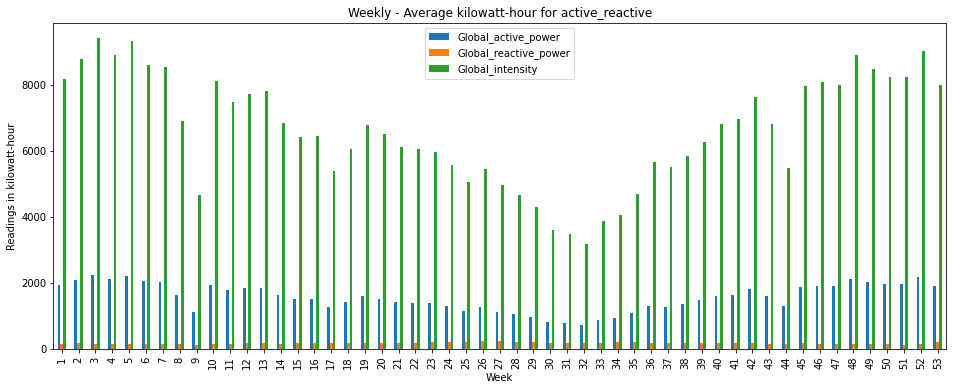

In [84]:
# Weekly - Average kilowatt-hour for active_reactive

df_active_reactive.groupby(df_active_reactive.index.week).mean().plot(kind="bar",xlabel='Week',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Weekly - Average kilowatt-hour for active_reactive")

###Observation for Weekly Global Reactive Power, Global Reactive Power and Global Intensity (in kilowatt hour)

Consumption of energy for Weekly Global Reactive Power, Global Reactive Power and Global Intensity on average remains high in almost all weeks except weeks between 28th to 33rd

#### Summary
1. From the above all plots, we cans ee that the data is seasonal data, non-stationary
2. Consumption of energy is maximum mostly in 1st and 4th quarter, whereas the consumption of energy starts reducing from second quarter and decreases till 3rd quarter.
3. May be due to winter or Summers, consumption of power because of water heater or AC increases or due to festival celebrations at home with relatives and family members, whereas during rainy season, there is possibility of power cut due to heavy rain falls, less use of AC, some family might prefer outing in monsoon or so.


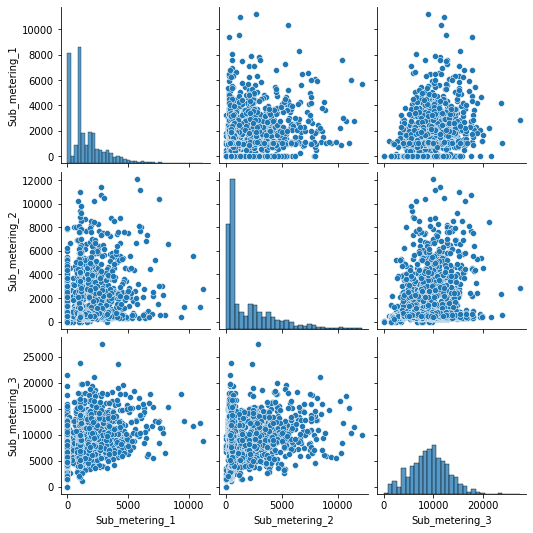

In [85]:
# Pair plot to see the relationship between variables in dataset

sns.pairplot(data=df_sub_meterings,kind="scatter")

#### Summary
1. We can see that the Submetering 1 and 2 data is left skewed. most values are clustered around the left tail of the distribution while the right tail of the distribution is longer, whereas the Submetering 3 has normally distributed data
2. There are some positive relation between all the three submeterings

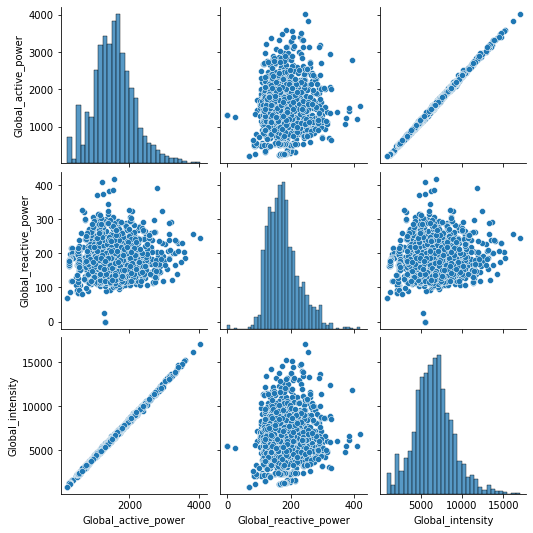

In [86]:
sns.pairplot(data=df_active_reactive,kind="scatter")

#### Summary
1. We can see that the Global Active, Global Reactive power and Global Intensity are almost normally distributed 
2. Global Active power and Global Intensity has positive linear relationship 
3. Global Reactive power does not much relationship with Global Intensity and Global Active power
4. From week 9 analysis, we also understood why there is less consumption of energy for year 2007 and 2008, which will help us to evaluate while forecasting.


- As, we are now able to connect dots and almost found the underlying patterns and trends from the data, we are ready to move towards next step of model Building. Before that we need to check whether the data is stationary or non stationary. 

- If non-stationary convert the data to stationary, check whether it has cyclic or seasonal trend and then we can use this data in our three models ARIMA, SARIMA and SARIMAX.

- After evaluating results, which model is performing better on our data, we'll finalize our model and conclude it.